# Binary Classifier Model for evaluating reviews

# Introduction

In today's world, one's image is often more important than actual attributes. This image is subjective and is a result of how others perceive us. Similarly, reviews are a result of other people's perception of a product. 

Consumers often make use of reviews as a way to evaluate the image of a company, writing negative comments for what they view as a problem, like poor service, and positive comments for good things, like well-designed products. Companies have also attempted to translate these reviews into numerical values, giving consumers the ability to rate the product using numbers.

However, due to the subjective nature of reviews, it can be difficult for consumers to accurately rate how they feel about a product using numbers. As such, the numbers used to rate a product may not be as precise as the comments written about the product. If there was a better way of classifying reviews into a more balanced and "fair" review of a product, both consumers and companies could benefit from an improved understanding about the general sentiment regarding a product.

## Defining the problem and Assembling a dataset

### Defining the problem

In order to produce a more "fair" evaluation of a product based on the actual comments written by consumers, I will be analysing the sentiments in the reviews of airlines. While service plays a major part in airline quality, it is also a very subjective topic. What one individual may find as pleasant and helpful, can be interpreted by another as intrusive and annoying. This makes it possible to find a wide range of responses with varying sentiments about airlines.

By thoroughly analysing these reviews, it would increase our understanding of the emotions behind the comments, enabling us to sort reviews into categories. In this case, we will just be sorting them into positive and negative reviews.
With time and feedback from companies and consumers, I think that this could be the foundations of a bot that would be able to give a fair evaluation of a product's overall image, just based on comments alone, without the need for an inaccurate numerical rating system.

### Assessing the data

The dataset used may not contain all reviews from every airline, and the reviews may mostly come from a limited group of countries. The dataset also consists of a mixture of verified and unverified reviews, which can make it difficult to identify genuine reviews.

### Assembling a dataset

For the data I intend to use, I have taken a dataset of airline reviews from Kaggle. This dataset is an uncleaned comma-separated values(CSV) file, with a usability rating of 10.0 and licensing, CC0 1.0 Universal(CC0 1.0) Public Domain Dedication. 

The dataset is composed of 5 columns and 3418 rows of data. Specific columns and rows will be extracted from the dataset, which will be composed of reviews from verified trips only, in order to help filter out fake reviews. The numerical ratings will be removed and the comments will be put into the nltk library's of SentimentIntensityAnalyzer, where the polarity will decide whether the comments are positive or negative. 

## Choosing a measure of success

For my binary classification model, success is determined by the Area under the ROC Curve(AUC) and the accuracy evaluation strategy of the model, with the AUC taking priority as the key indicator of the model's performance.

AUC is the area under the curve which demonstrates the model’s ability to perform at all classification thresholds. It plots the True Positive Rate and False Positive Rate of the model across the different thresholds

The imbalance of data is mild but present in the dataset, but will be resolved by oversampling, therefore precision and recall will not have to be closely monitored alongside the AUC and loss function.

The loss function is a way of evaluating the ability of the algoirthm to model the dataset. It maps the values of the variables onto a real number, acting as an intuitive representation of the absolute difference between our prediction and the actual value.  

The loss function and AUC will be plotted across the epochs to show the performance of the models built and will be used to determine the most optimal model.

### Deciding the evaluation protocol

An evaluation protocol is a set of guidelines that we can use to assess the performance of a machine learning model. 
It covers the steps for selecting the appropriate evaluation metrics, splitting the data into training and testing sets, tuning hyperparameters, and comparing the performance of different models.

The evaluation protocol is crucial for ensuring that the performance of the machine learning model is evaluated fairly and accurately. It helps to prevent overfitting by ensuring that the model's performance is evaluated on unseen data, and it helps to identify the best performing model for the given problem. In a binary classification problem, evaluation metrics such as accuracy, precision, recall, and F1-score can be used.

Overall, the evaluation protocol plays a critical role in ensuring that the performance of a machine learning model is evaluated fairly and accurately, and that the best model is selected for the given problem.

For this dataset, I will be using both the holdout evaluation protocol and the K-fold cross-validation.
The data will be split into training, testing, and validation sets, with a fixed proportion of the data allocated to each set. The model is trained on the training set, the hyperparameters are tuned on the validation set, and the test set is used to evaluate the performance. This protocol is simple and quick, and is able to run as the imbalance of data is fixed through oversampling.

K-fold cross-validation will be used with GridSearchCV to trial the various hyperparameters and tune them to find the optimal hyperparameters for the best possible model. This will help to reduce the variance of the performance estimates. 

For this project, we will mainly be observing he hyperparameters:
- Number of hidden layers
- Number of neurons
- Dropout value

## Preparing your data

I will be preparing my data by eliminating any irrelevant data from the dataset.
The reviews will be cleaned and their verification status will be separated from their comments. Their comments will then be extracted through the use of Regular Expression, the Removal of Stopwords, and Lemmatisation.

The polarity of the comments will be measured through sentiment analysis and the polarity scores will be classified as follows:
- Negative: Less than 0
- Positive: More than equals to 0

### Importing libraries

In [81]:
# Building the Deep Learning model for text classification
from tensorflow.keras import models, layers
import tensorflow as tf

# Data visualisations
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# Statistics
import numpy as np
from numpy import where

# Regularizations
from tensorflow.keras import regularizers 
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing

# Evaluation
from sklearn.metrics import balanced_accuracy_score,confusion_matrix, precision_score, recall_score

# Model optimization methods 
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Text analysis
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight
#Stop words
import nltk
nltk.download('all')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('stopwords')

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Text classification
from gensim.models import Word2Vec

# SMOTE - resampling imbalanced data
from imblearn.over_sampling import SMOTE
import collections
from collections import Counter

# Model Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import RMSprop

from keras.utils import to_categorical

# Setting initial variables
SEED = 321
tf.random.set_seed(SEED)
np.random.seed(SEED)

import warnings
warnings.filterwarnings('ignore')

import itertools    
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,roc_auc_score,ConfusionMatrixDisplay

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

### Retrieving the airline data dataset

In [82]:
# create the dataframe
df = pd.read_csv('airline_data.csv')

### Inspecting dataset

In [83]:
df.head()

,Unnamed: 0,reviews,rates,date,country
0,0,✅ Trip Verified | Excellent service both on th...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,24th January 2023,United Kingdom
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9,24th January 2023,United Kingdom
2,2,✅ Trip Verified | A really excellent journey....,9,23rd January 2023,United Kingdom
3,3,✅ Trip Verified | This flight was one of the ...,9,21st January 2023,United Kingdom
4,4,Not Verified | It seems that there is a race t...,2,19th January 2023,United States


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3418 entries, 0 to 3417
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3418 non-null   int64 
 1   reviews     3418 non-null   object
 2   rates       3418 non-null   object
 3   date        3418 non-null   object
 4   country     3416 non-null   object
dtypes: int64(1), object(4)
memory usage: 133.6+ KB


### Preprocessing Data

#### Cleaning the data and extracting comments (modified from original Kaggle)

First, we check which comments are verified

In [85]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [86]:
df.verified.value_counts()

False    2442
True      976
Name: verified, dtype: int64

In [87]:
# preparing all reviews for processing (original code)
for rev in df.reviews:
    if "Verified" not in rev:
        df.reviews.replace(rev, "|"+rev, inplace=True) 

Next we will lemmatize the comments and further clean the data

In [88]:
# for lemmatization of words we will use nltk library
lemma = WordNetLemmatizer()

# use split instead to remove verified (original code)
reviews_data = df.reviews.str.split("|", expand=True).drop(0, axis=1)[1].tolist()

# create an empty list to collect cleaned data corpus
comments =[]

# loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    comments.append(rev)

In [89]:
# add the corpus to the original dataframe

df['comments'] = comments

In [90]:
df.head(10)

,Unnamed: 0,reviews,rates,date,country,verified,comments
0,0,✅ Trip Verified | Excellent service both on th...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,24th January 2023,United Kingdom,True,excellent service ground board first class pro...
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9,24th January 2023,United Kingdom,True,good lounge cape town time departure drink hig...
2,2,✅ Trip Verified | A really excellent journey....,9,23rd January 2023,United Kingdom,True,really excellent journey lounge overcrowded la...
3,3,✅ Trip Verified | This flight was one of the ...,9,21st January 2023,United Kingdom,True,flight one worst ever life wanted pamper bough...
4,4,Not Verified | It seems that there is a race t...,2,19th January 2023,United States,False,seems race bottom amongst airline cannot even ...
5,5,Not Verified | As a Spanish born individual l...,3,19th January 2023,United Kingdom,False,spanish born individual living england using b...
6,6,✅ Trip Verified | A rather empty and quiet fl...,2,18th January 2023,United Kingdom,True,rather empty quiet flight tel aviv friendly ca...
7,7,✅ Trip Verified | Easy check in and staff mem...,9,17th January 2023,United Kingdom,True,easy check staff member polite helpful made sp...
8,8,✅ Trip Verified | Being a silver flyer and bo...,9,17th January 2023,United Kingdom,True,silver flyer booking flight ba dublin would th...
9,9,Not Verified | I find BA incredibly tacky and...,1,16th January 2023,United Kingdom,False,find ba incredibly tacky constantly looking wa...


In [91]:
df.dtypes

Unnamed: 0     int64
reviews       object
rates         object
date          object
country       object
verified        bool
comments      object
dtype: object

In [92]:
# convert the date to datetime format

df.date = pd.to_datetime(df.date)

In [93]:
df.date.head()

0   2023-01-24
1   2023-01-24
2   2023-01-23
3   2023-01-21
4   2023-01-19
Name: date, dtype: datetime64[ns]

In [94]:
#check for unique values
df.rates.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '9', '2', '3', '1', '4', '5', '8',
       '6', '7', '10', 'None'], dtype=object)

In [95]:
# remove the \t and \n from the ratings
df.rates = df.rates.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [96]:
df.rates.value_counts()

1       745
2       385
3       380
8       344
10      303
7       297
9       293
5       255
4       232
6       179
None      5
Name: rates, dtype: int64

In [97]:
# drop the rows where the value of ratings is None
df.drop(df[df.rates == "None"].index, axis=0, inplace=True)

In [98]:
#check the unique values again
df.rates.unique()

array(['5', '9', '2', '3', '1', '4', '8', '6', '7', '10'], dtype=object)

In [99]:
df.isnull().value_counts()

Unnamed: 0  reviews  rates  date   country  verified  comments
False       False    False  False  False    False     False       3411
                                   True     False     False          2
dtype: int64

In [100]:
#drop the rows using index where the country value is null
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [101]:
df.isnull().value_counts()

Unnamed: 0  reviews  rates  date   country  verified  comments
False       False    False  False  False    False     False       3411
dtype: int64

In [102]:
#resetting the index
df.reset_index(drop=True)

,Unnamed: 0,reviews,rates,date,country,verified,comments
0,0,✅ Trip Verified | Excellent service both on th...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...
2,2,✅ Trip Verified | A really excellent journey....,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...
3,3,✅ Trip Verified | This flight was one of the ...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...
4,4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,seems race bottom amongst airline cannot even ...
...,...,...,...,...,...,...,...
3406,3413,|Flew British Airways from Sydney to Venice on...,6,2014-05-20,Australia,False,flew british airway sydney venice nd april ret...
3407,3414,|Recently for our honeymoon we took advantage ...,10,2014-05-19,United Kingdom,False,recently honeymoon took advantage ba promo fly...
3408,3415,|LGW-Antigua on 29 April and Antigua-LGW on 13...,1,2014-05-18,United Kingdom,False,lgw antigua april antigua lgw may boeing start...
3409,3416,|LHR-JTR-LHR. A tale of opposites for BA's new...,4,2014-05-18,United Kingdom,False,lhr jtr lhr tale opposite ba new route santori...


### Removing irrelevant data from the dataset: 
Getting only verified comments

In [103]:
review_df = df[['verified','comments']].copy()

In [104]:
review_df.head(10)

,verified,comments
0,True,excellent service ground board first class pro...
1,True,good lounge cape town time departure drink hig...
2,True,really excellent journey lounge overcrowded la...
3,True,flight one worst ever life wanted pamper bough...
4,False,seems race bottom amongst airline cannot even ...
5,False,spanish born individual living england using b...
6,True,rather empty quiet flight tel aviv friendly ca...
7,True,easy check staff member polite helpful made sp...
8,True,silver flyer booking flight ba dublin would th...
9,False,find ba incredibly tacky constantly looking wa...


In [105]:
review_df = review_df[review_df["verified"] == True]

In [106]:
review_df = review_df.drop("verified", axis = 1)

In [107]:
review_df.head()

,comments
0,excellent service ground board first class pro...
1,good lounge cape town time departure drink hig...
2,really excellent journey lounge overcrowded la...
3,flight one worst ever life wanted pamper bough...
6,rather empty quiet flight tel aviv friendly ca...


In [108]:
#resetting the index
review_df.reset_index(drop=True)

,comments
0,excellent service ground board first class pro...
1,good lounge cape town time departure drink hig...
2,really excellent journey lounge overcrowded la...
3,flight one worst ever life wanted pamper bough...
4,rather empty quiet flight tel aviv friendly ca...
...,...
971,hour delay airport flight destined verona arri...
972,flew british airway madrid london heathrow air...
973,tel aviv london arrived airport lot time due s...
974,london tel aviv arrived heathrow pm expecting ...


## Feature Extraction

In [109]:
# create a copy of the dataset
review_data = review_df.copy()

In [110]:
# count characters
def char_count(text):
    charC=0
    for char in text.split():
        charC +=len(char)
    return charC

In [111]:
stop_words = stopwords.words('english')

def feature_extract(review_data):
    # number of words
    review_data['word_count'] = review_data['comments'].apply(lambda x : len(str(x).split(" ")))
    # save character count as new column
    review_data['char_count']=review_data['comments'].apply(char_count)
    # number of stopwords
    review_data['stopwords_count'] = review_data['comments'].apply(lambda x: len([x for x in x.split() if x in stop_words]))

In [112]:
feature_extract(review_data)

### Sentiment Analysis

We will now perform sentiment analysis to get a more accurate assessment of the comments given in the reviews.

In [113]:
sentiment_analyser = SentimentIntensityAnalyzer()

In [114]:
#Subjectivity of the processed data
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [115]:
#Polarity of the processed data
#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [116]:
review_data['comments']

0       excellent service ground board first class pro...
1       good lounge cape town time departure drink hig...
2       really excellent journey lounge overcrowded la...
3       flight one worst ever life wanted pamper bough...
6       rather empty quiet flight tel aviv friendly ca...
                              ...                        
1143    hour delay airport flight destined verona arri...
1144    flew british airway madrid london heathrow air...
1145    tel aviv london arrived airport lot time due s...
1146    london tel aviv arrived heathrow pm expecting ...
1147    kuala lumpur madrid via london first time flyi...
Name: comments, Length: 976, dtype: object

In [117]:
#Creating columns to display subjectivity and polarity
review_data['Subjectivity'] = review_data['comments'].apply(getSubjectivity)
review_data['Polarity'] = review_data['comments'].apply(getPolarity)

In [118]:
def getSentiments(score):
    if score < 0:
        return 'Negative'
    elif score == 0 or score > 0:
        return 'Positive'
review_data['sentiments'] = review_data['Polarity'].apply(getSentiments)

In [119]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 0 to 1147
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comments         976 non-null    object 
 1   word_count       976 non-null    int64  
 2   char_count       976 non-null    int64  
 3   stopwords_count  976 non-null    int64  
 4   Subjectivity     976 non-null    float64
 5   Polarity         976 non-null    float64
 6   sentiments       976 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 61.0+ KB


### Data Visualisation for sentiment analysis

#### Scatterplot to visualize sentiments against subjectivity

In [120]:
#Creating a new dataframe sort_data to sort te polarity amd computation analysis
sorted_reviews = review_data.sort_values(by=['Polarity'])

In [121]:
sorted_reviews['sentiments'] = sorted_reviews[['sentiments']]

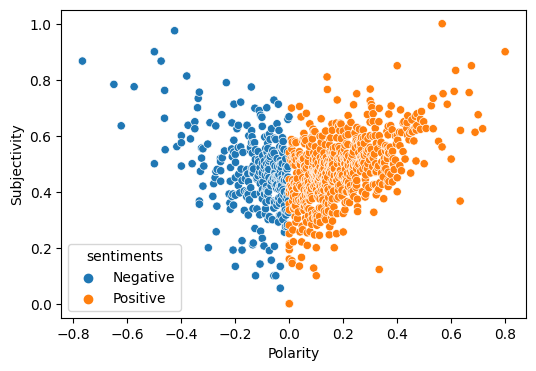

In [122]:
fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(x='Polarity', y='Subjectivity', hue='sentiments', data = sorted_reviews) 
plt.show()

In [123]:
#Percentage of positive comments
posComments = sorted_reviews[sorted_reviews.sentiments=='Positive']
posComments = posComments['comments']
round((posComments.shape[0]/sorted_reviews.shape[0] * 100), 2)

68.65

In [124]:
#Percentage of negative comments
negComments = sorted_reviews[sorted_reviews.sentiments=='Negative']
negComments = negComments['comments']
round((negComments.shape[0]/sorted_reviews.shape[0] * 100), 2)

31.35

#### Bar chart to observe dataset's balance

<Axes: title={'center': 'Airline Review Analysis'}, xlabel='sentiments', ylabel='count'>

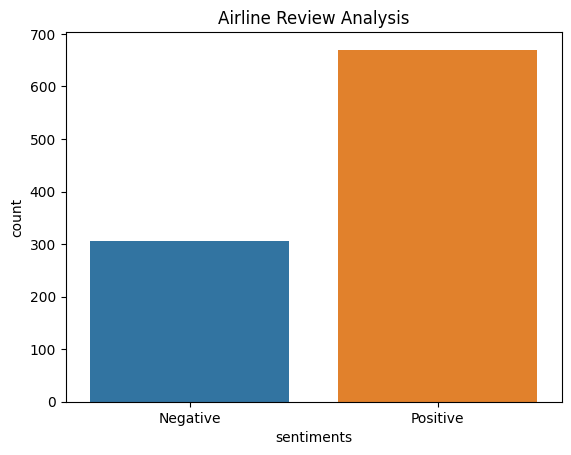

In [125]:
sorted_reviews['sentiments'].value_counts()
plt.title('Airline Review Analysis')
plt.xlabel('General Sentiment Type')
plt.ylabel('Count')
sns.countplot(x='sentiments', data = sorted_reviews)

### Feature Engineering

We now need to select the feature columns and transform them into features that can be used to train the model.
In this model, the columns would be the "comments" and "sentiments".
The dataset will be split into a : ratio for the training and testing data. Features will be taken from the new dataframe, text_data.
I have limited the number of features to 5000, due to the smaller dataset I am using.

In [126]:
text_data = pd.DataFrame().assign(text=sorted_reviews['comments'], sentiments=sorted_reviews['sentiments'])

In [127]:
TEST_SIZE = 0.3

(text_train, text_test, 
 sentiment_train, sentiment_test) = train_test_split(text_data['text'], text_data['sentiments'], 
                                         test_size=TEST_SIZE, stratify=text_data['sentiments'],
                                                     shuffle=True, random_state=SEED)

In [128]:
MAX_FEATURES = 5000
NGRAMS = 2

tfidf = TfidfVectorizer(ngram_range=(1, NGRAMS), max_features=MAX_FEATURES)
tfidf.fit(text_train)

X_train, X_test = tfidf.transform(text_train).toarray(), tfidf.transform(text_test).toarray()

In [129]:
label_encoder = LabelEncoder()
label_encoder.fit(text_data['sentiments'])

y_train = label_encoder.transform(sentiment_train)
y_test = label_encoder.transform(sentiment_test)

In [130]:
oversampling = SMOTE()
X_train, y_train = oversampling.fit_resample(X_train, y_train)

In [131]:
VALIDATION_SIZE = X_test.shape[0]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                 test_size=VALIDATION_SIZE, stratify=y_train,
                                                 shuffle=True, random_state=SEED)

### Baseline

Given that the classes are originally imbalanced, with positive comments taking about the largest proportion, 69% of the dataset, the original baseline should be 0.69. However, we have used oversampling to balance the classes, therefore, the naive baseline of a binary classifier with balanced classes is 0.5.

## Developing a model that does better than a baseline 

In [132]:
# MLP Model Instatiation
def deep_neural_network(hidden_layers=0, hidden_neurons=np.nan, activation=None,
                        dropout=np.nan, input_dimension=2, output_dimension=1,
                        optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'],
                        name=None):
    
    model = Sequential()
    for layer in range(hidden_layers) :
        model.add(Dense(hidden_neurons, 
                  activation=activation, 
                  input_shape='default' if layer>1 else (input_dimension,)))
        if ~np.isnan(dropout) :
            model.add(Dropout(dropout))
        
    model.add(Dense(output_dimension, 
                    activation='sigmoid' if output_dimension==1 else 'softmax',
                    input_shape='default' if hidden_layers>0 else (input_dimension,)))
  
    if name is not None :
        model._name = name
        
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    
    return model

In [133]:
# Fitting MLP Classification Model
def train_deep_neural_network(model, X, y, 
                              batch_size=32, epochs=100, 
                              val_data=None, callbacks=[], seed=0):
    
    if val_data is None :
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, 
                                                          random_state=seed, shuffle=True, 
                                                          stratify=y)
        
    else :
        X_train, y_train, X_val, y_val = X, y, val_data[0], val_data[1]
  

    history = model.fit(X_train, y_train,
                        batch_size=batch_size, epochs=epochs, 
                        validation_data=(X_val, y_val),
                        callbacks=callbacks,
                        verbose=0)

    return {'model': model, 
            'val_score': model.evaluate(X_val, y_val, verbose=0)[1:], 
            'history': history }

In [134]:
INPUT_DIMENSION = X_train.shape[1]
OUTPUT_DIMENSION = 1

OPTIMIZER = 'rmsprop'
LOSS_FUNC = 'binary_crossentropy'
METRICS = ['accuracy', 
           tf.keras.metrics.Precision(name='precision'), 
           tf.keras.metrics.Recall(name='recall'),
           tf.keras.metrics.AUC(name='AUC')
           ]

In [135]:
slp_model = deep_neural_network(hidden_layers=0, 
                                input_dimension=INPUT_DIMENSION, output_dimension=OUTPUT_DIMENSION,
                                optimizer=OPTIMIZER, 
                                loss=LOSS_FUNC, metrics=METRICS,
                                name='Single_Layer_Perceptron')

In [136]:
slp_model.summary()

Model: "Single_Layer_Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_187 (Dense)           (None, 1)                 5001      
                                                                 
Total params: 5,001
Trainable params: 5,001
Non-trainable params: 0
_________________________________________________________________


In [137]:
batch_size = 512
EPOCHS = 100

MONITOR = 'val_loss'
PATIENCE = 5

EARLY_STOP = EarlyStopping(monitor=MONITOR, restore_best_weights=True, patience=PATIENCE, verbose=0)

In [138]:
trained_slp_model = train_deep_neural_network(slp_model, X_train, y_train,
                                              batch_size=batch_size, epochs=500, 
                                              val_data=(X_val, y_val), 
                                              callbacks=[EARLY_STOP], seed=SEED)

In [139]:
print('Accuracy (Validation): {:.2f}'.format(trained_slp_model['val_score'][0]))
print('AUC (Validation): {:.2f}'.format(trained_slp_model['val_score'][1]))
print('Precision (Validation): {:.2f}'.format(trained_slp_model['val_score'][2]))
print('Recall (Validation): {:.2f}'.format(trained_slp_model['val_score'][3]))

Accuracy (Validation): 0.86
AUC (Validation): 0.85
Precision (Validation): 0.88
Recall (Validation): 0.96


In [140]:
preds = trained_slp_model['model'].predict(X_val, verbose=0)

In [141]:
def plot_training_history(history, monitors=['loss', 'AUC']) :

  # using the variable axs for multiple Axes
  fig, axs = plt.subplots(1, 2, sharex='all', figsize=(15,5))
 
  for ax, monitor in zip(axs.flat, monitors) :
    loss, val_loss = history.history[monitor], history.history['val_' + monitor]

    if monitor == 'loss' :
      monitor = monitor.capitalize()

    epochs = range(1, len(loss)+1)

    ax.plot(epochs, loss, 'b.', label=monitor)
    ax.plot(epochs, val_loss, 'r.', label='Validation ' + monitor)
    ax.set_xlim([0, len(loss)])
    ax.title.set_text('Training and Validation ' + monitor + 's')
    ax.set_xlabel('Epochs')
    ax.set_ylabel(monitor)
    ax.legend()
    ax.grid()

  _ = plt.show()

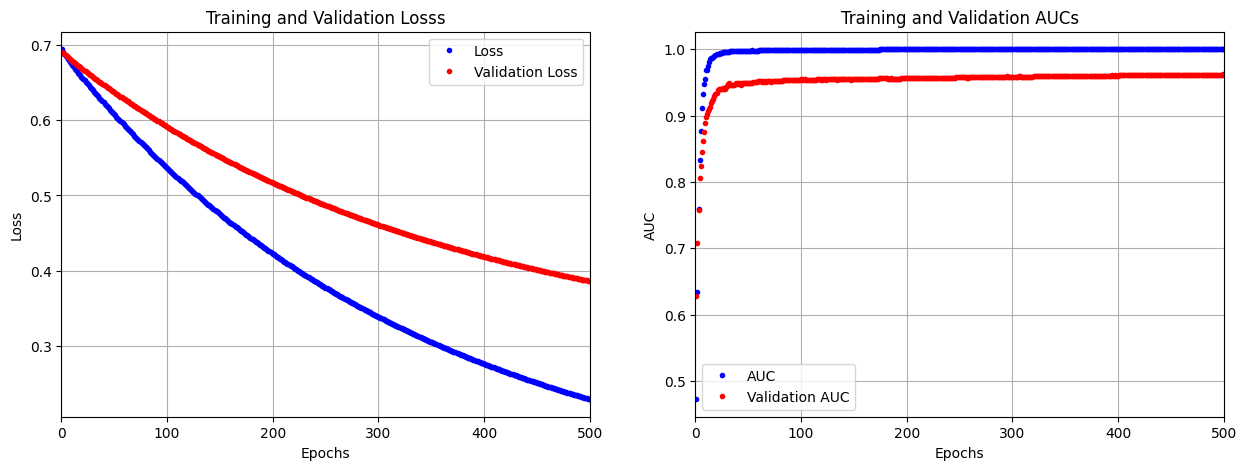

In [142]:
plot_training_history(trained_slp_model['history'], monitors=['loss', 'AUC'])

## Scaling up: developing a model that overfits

In [143]:
mlp_model = deep_neural_network(hidden_layers=3, hidden_neurons=64,
                                activation='relu',
                                input_dimension=INPUT_DIMENSION, output_dimension=OUTPUT_DIMENSION,
                                optimizer=OPTIMIZER, 
                                loss=LOSS_FUNC, metrics=METRICS,
                                name='Multi_Layer_Perceptron')

mlp_model.summary()

Model: "Multi_Layer_Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_188 (Dense)           (None, 64)                320064    
                                                                 
 dense_189 (Dense)           (None, 64)                4160      
                                                                 
 dense_190 (Dense)           (None, 64)                4160      
                                                                 
 dense_191 (Dense)           (None, 1)                 65        
                                                                 
Total params: 328,449
Trainable params: 328,449
Non-trainable params: 0
_________________________________________________________________


In [144]:
trained_mlp_model = train_deep_neural_network(mlp_model, X_train, y_train,
                                              batch_size=batch_size, epochs=EPOCHS, 
                                              val_data=(X_val, y_val), 
                                              callbacks=[], seed=SEED)

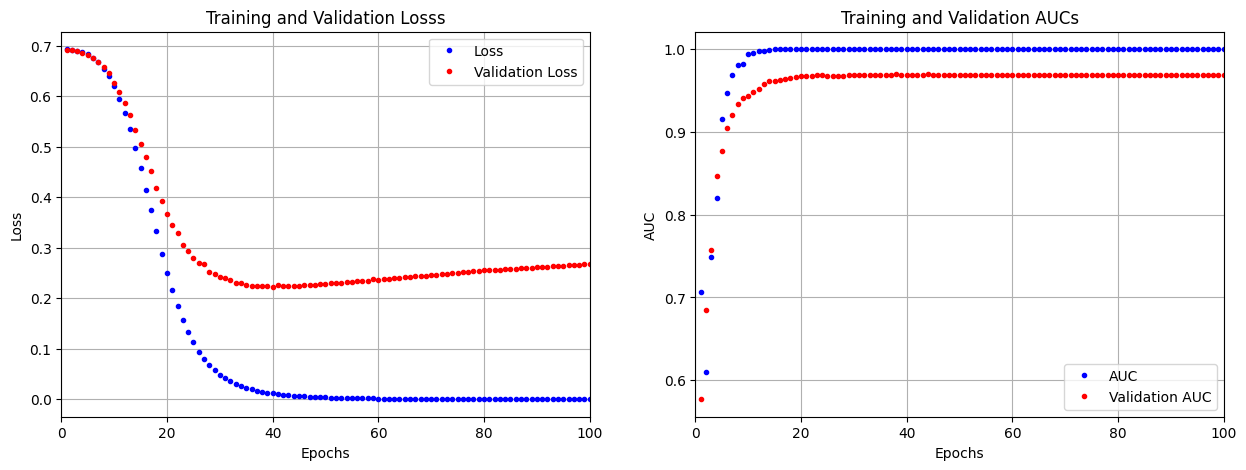

In [145]:
plot_training_history(trained_mlp_model['history'], monitors=['loss', 'AUC'])

In [146]:
print('Accuracy (Validation): {:.2f}'.format(trained_mlp_model['val_score'][0]))
print('Precision (Validation): {:.2f}'.format(trained_mlp_model['val_score'][1]))
print('Recall (Validation): {:.2f}'.format(trained_mlp_model['val_score'][2]))
print('AUC (Validation): {:.2f}'.format(trained_mlp_model['val_score'][3]))

Accuracy (Validation): 0.89
Precision (Validation): 0.89
Recall (Validation): 0.90
AUC (Validation): 0.97


In [147]:
preds = trained_mlp_model['model'].predict(X_val, verbose=0)

## Regularizing your model and tuning your hyperparameters: 
Using GridSearchCV and K fold cross-validation

In [148]:
# Reformat Grid CV Stats to Dataframe
def to_dataframe(stats, mapping) :
    entries = []
    for param, metrics in stats.items() :
        entry = eval(param)
        for key, value in metrics.items() :
            entry[key] = value
        
        for key, value in mapping.items() :
            entry[value] = entry['scores'][key]
            
        entry.pop('scores') 
        
        entries.append( entry )

    return pd.DataFrame(data=entries)

In [149]:
# Grid Search CV
def grid_search_cv(X, y,
                   space, cv, 
                   optimizer, loss, metrics, 
                   epochs, callbacks=[], seed=0, order={}) :
    
    keys, values = zip(*space.items())
    
    stats = {}
    for params in [dict(zip(keys, v)) for v in itertools.product(*values)] :
        kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
        
        scores, stopped, losses = [], [], []
        for train, validate in kfold.split(X, y) :
            model = deep_neural_network(hidden_layers=params['hidden_layers'], 
                                        hidden_neurons=params['neurons'], 
                                        activation=params['activation'], 
                                        dropout=params['dropout'], 
                                        input_dimension=X.shape[1], 
                                        output_dimension=1 if len(y.shape)<2 else y.shape[1],
                                        optimizer=optimizer, 
                                        loss=loss, metrics=metrics)
      
            trained = train_deep_neural_network(model, 
                                                X[train,:], y[train], 
                                                
                                                batch_size=params['batch_size'], epochs=epochs, 
                                                val_data=(X[validate,:], y[validate]), 
                                                callbacks=callbacks, seed=seed) 
            
            evaluations = trained['model'].evaluate(X[validate,:], y[validate], verbose=0)[1:]
            scores.append( evaluations )
            stopped.append( len(trained['history'].history['val_loss']) )
            losses.append( np.min(trained['history'].history['val_loss']) )
        
        stats[str(params)] = { 'scores': np.mean(scores, axis=0), 
                               'epochs': np.mean(stopped), 
                               'val_loss': np.mean(losses) }
    
    return to_dataframe(stats, order)

In [150]:
orders = {
    0: 'categorical_accuracy',              
    1: 'precision',
    2: 'recall',
    3: 'auc',
}

In [151]:
KFOLDS = 5

In [152]:
params = {
    'hidden_layers': [1, 2, 3],
    'neurons': [32,64],
    'activation': ['relu'],
    'dropout': [0.2,0.5],
    'batch_size': [512]
}


stats = grid_search_cv(X_train, y_train,  
                       space=params, cv=KFOLDS, 
                       optimizer=OPTIMIZER, 
                       loss=LOSS_FUNC, metrics=METRICS, 
                       epochs=EPOCHS, callbacks=[EARLY_STOP], seed=SEED, order=orders)

In [153]:
stats.sort_values(by=['auc'], ascending=False).head(10)

,hidden_layers,neurons,activation,dropout,batch_size,epochs,val_loss,categorical_accuracy,precision,recall,auc
11,3,64,relu,0.5,512,92.4,0.252789,0.885271,0.907896,0.860769,0.965433
8,3,32,relu,0.2,512,90.2,0.242413,0.888372,0.909822,0.863654,0.963966
6,2,64,relu,0.2,512,93.6,0.257294,0.883721,0.901583,0.867019,0.963365
9,3,32,relu,0.5,512,100.0,0.350276,0.883721,0.883919,0.888558,0.962212
7,2,64,relu,0.5,512,100.0,0.268009,0.883721,0.922558,0.838990,0.962067
5,2,32,relu,0.5,512,100.0,0.358749,0.882171,0.908465,0.854567,0.961779
10,3,64,relu,0.2,512,65.2,0.248681,0.883721,0.898243,0.866827,0.961731
4,2,32,relu,0.2,512,100.0,0.304290,0.875969,0.928979,0.817500,0.959567
1,1,32,relu,0.5,512,100.0,0.489030,0.877519,0.897091,0.854423,0.956899
0,1,32,relu,0.2,512,100.0,0.474731,0.869767,0.911504,0.823846,0.956611


In [178]:
opt_model = deep_neural_network(hidden_layers=3, hidden_neurons=64,
                                dropout=0.5, activation='relu',
                                input_dimension=INPUT_DIMENSION, 
                                output_dimension=OUTPUT_DIMENSION,
                                optimizer=OPTIMIZER, 
                                loss=LOSS_FUNC, metrics=METRICS,
                                name='Optimized_Deep_Network')

opt_model.summary()

Model: "Optimized_Deep_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_380 (Dense)           (None, 64)                320064    
                                                                 
 dropout_246 (Dropout)       (None, 64)                0         
                                                                 
 dense_381 (Dense)           (None, 64)                4160      
                                                                 
 dropout_247 (Dropout)       (None, 64)                0         
                                                                 
 dense_382 (Dense)           (None, 64)                4160      
                                                                 
 dropout_248 (Dropout)       (None, 64)                0         
                                                                 
 dense_383 (Dense)           (None, 1)      

In [179]:
trained_opt_model = train_deep_neural_network(opt_model, X_train, y_train,
                                              batch_size=batch_size, epochs=EPOCHS, 
                                              val_data=(X_val, y_val), 
                                              callbacks=[EARLY_STOP], seed=SEED)

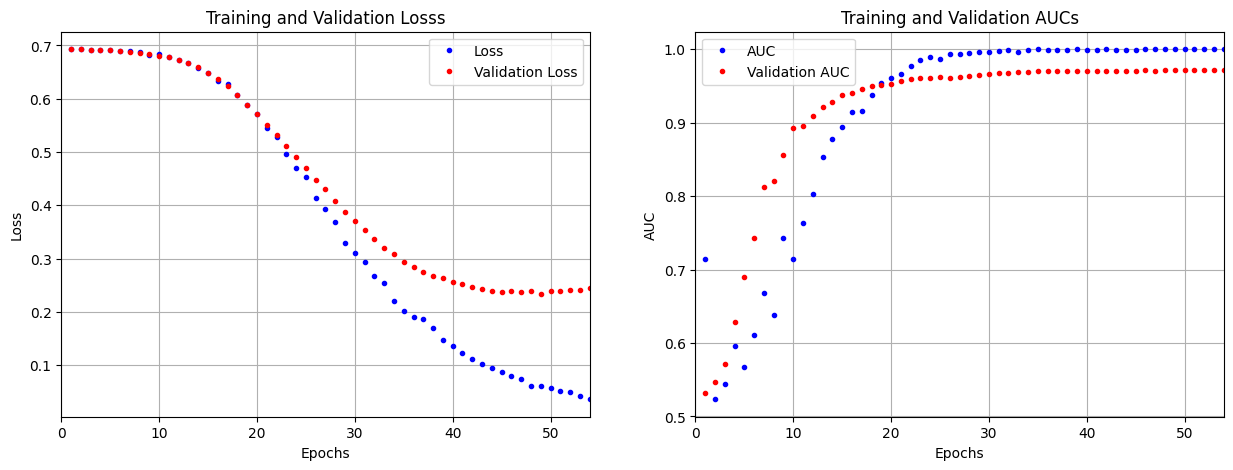

In [180]:
plot_training_history(trained_opt_model['history'], monitors=['loss', 'AUC'])

In [181]:
print('Accuracy (Validation): {:.2f}'.format(trained_opt_model['val_score'][0]))
print('Precision (Validation): {:.2f}'.format(trained_opt_model['val_score'][1]))
print('Recall (Validation): {:.2f}'.format(trained_opt_model['val_score'][2]))
print('AUC (Validation): {:.2f}'.format(trained_opt_model['val_score'][3]))

Accuracy (Validation): 0.88
Precision (Validation): 0.88
Recall (Validation): 0.89
AUC (Validation): 0.97


In [182]:
preds = trained_opt_model['model'].predict(X_val, verbose=0)

In [183]:
preds = trained_opt_model['model'].predict(X_test, verbose=0)

print('Accuracy (Test): {:.2f}'.format(accuracy_score(y_test, 
                                                                        (preds > 0.5).astype('int32'))) )
print('Precision (Test): {:.2f}'.format(precision_score(y_test, 
                                                       (preds > 0.5).astype('int32'))))
print('Recall (Test): {:.2f}'.format(recall_score(y_test, 
                                                  (preds > 0.5).astype('int32'))))
print('AUC (Test): {:.2f}'.format(roc_auc_score(y_test, preds)))

Accuracy (Test): 0.74
Precision (Test): 0.80
Recall (Test): 0.84
AUC (Test): 0.85


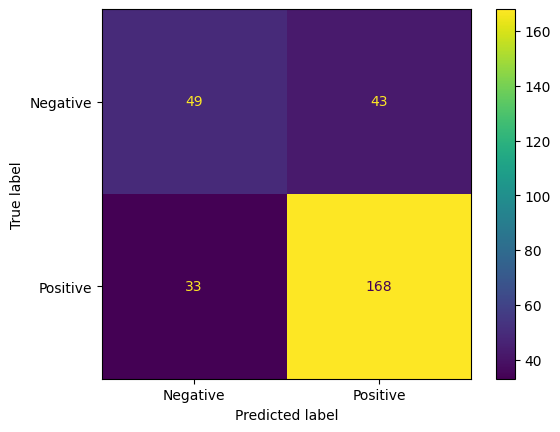

In [184]:
disp = ConfusionMatrixDisplay( confusion_matrix(y_test, (preds > 0.5).astype('int32')),  
                              display_labels=['Negative', 'Positive'] )
_ = disp.plot()

## Analysing the optimal model

By observation,
- Validation Evaluation Scores: The evaluation metrics of the validation score could be better but it performing well. The AUC is 0.97, which is close to 1.0. The precision and recall is under 0.9 which is room for improvement.
- AUC plot: The AUC curve is steep, and both training and validation sets are moving towards the top left. Showing that it is performing well
- Loss Plot: The loss plot decreases over the epochs, but starts to flatten out around 30 epochs. The performance can be better
- Confusion Matrix: The model is sub optimal to detect airline review sentiments.

## Summary
In this project, I worked on an airline review dataset. The raw dataset was preprocessed to make it suitable for a deep learning model.

For a binary classifier model, I chose the measure of success to be Accuracy, Precision, Recall and the AUC as these are the metrics that can be used to evaluate a classifier that is balanced.

Two evaluation metrics were tested which both produced similar findings on the data.